# Shila Rahman

## Research question/interests

My research interest includes understanding how a countries wealth and forest area relates to CO2 emission. I will be focusing on these 2 research question:

1) Does countries with higher GDP contirbutes more towards carbon emission?
2) Is GDP in any way related to a country's owned forest area?



In [ ]:
#MileStone2

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:

carbonEmissions = pd.read_csv('../data/raw/CO2emissions.csv', skiprows= 4) 
carbonEmissions = carbonEmissions.drop(carbonEmissions.columns[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33, 64, 65]], axis=1)
print(carbonEmissions)


                    Country Name      1990      1991      1992      1993  \
0                          Aruba       NaN       NaN       NaN       NaN   
1    Africa Eastern and Southern  0.999038  0.953224  0.915661  0.916485   
2                    Afghanistan  0.191745  0.167682  0.095958  0.084721   
3     Africa Western and Central  0.478144  0.530016  0.568305  0.523529   
4                         Angola  0.553662  0.544539  0.543557  0.708984   
..                           ...       ...       ...       ...       ...   
261                       Kosovo       NaN       NaN       NaN       NaN   
262                  Yemen, Rep.  0.567037  0.690937  0.704793  0.627105   
263                 South Africa  6.729799  6.424622  6.175430  6.219194   
264                       Zambia  0.340930  0.349232  0.337224  0.289956   
265                     Zimbabwe  1.585444  1.713321  1.694416  1.539741   

         1994      1995      1996      1997      1998  ...      2011  \
0         NaN  

In [51]:
globalGDP = pd.read_csv('../data/raw/gdp-per-capita-worldbank.csv')
print(globalGDP)

           Entity Code  Year  \
0     Afghanistan  AFG  2002   
1     Afghanistan  AFG  2003   
2     Afghanistan  AFG  2004   
3     Afghanistan  AFG  2005   
4     Afghanistan  AFG  2006   
...           ...  ...   ...   
6161     Zimbabwe  ZWE  2016   
6162     Zimbabwe  ZWE  2017   
6163     Zimbabwe  ZWE  2018   
6164     Zimbabwe  ZWE  2019   
6165     Zimbabwe  ZWE  2020   

      GDP per capita, PPP (constant 2017 international $)  
0                                           1189.784668    
1                                           1235.810059    
2                                           1200.277954    
3                                           1286.793701    
4                                           1315.789062    
...                                                 ...    
6161                                        3678.217041    
6162                                        3795.642334    
6163                                        3923.030518    
6164           

In [52]:
globalForestArea = pd.read_csv('../data/raw/share-global-forest.csv')
print(globalForestArea)


           Entity Code  Year  Share of global forest area
0     Afghanistan  AFG  1990                     0.028525
1     Afghanistan  AFG  1991                     0.028578
2     Afghanistan  AFG  1992                     0.028631
3     Afghanistan  AFG  1993                     0.028684
4     Afghanistan  AFG  1994                     0.028738
...           ...  ...   ...                          ...
7841     Zimbabwe  ZWE  2016                     0.432198
7842     Zimbabwe  ZWE  2017                     0.431596
7843     Zimbabwe  ZWE  2018                     0.430993
7844     Zimbabwe  ZWE  2019                     0.430389
7845     Zimbabwe  ZWE  2020                     0.429782

[7846 rows x 4 columns]


In [ ]:
#Milestone 3

In [48]:
## task 1

### cleaning carbon emission data set

carbonEmissions.melt(id_vars=["Country Name"], 
         value_name="Value",var_name="Year")



print(carbonEmissions)

                       Country Name  variable     value
0                             Aruba  variable  variable
1       Africa Eastern and Southern  variable  variable
2                       Afghanistan  variable  variable
3        Africa Western and Central  variable  variable
4                            Angola  variable  variable
...                             ...       ...       ...
131931                       Kosovo     value       NaN
131932                  Yemen, Rep.     value       NaN
131933                 South Africa     value       NaN
131934                       Zambia     value       NaN
131935                     Zimbabwe     value       NaN

[131936 rows x 3 columns]


In [49]:
## task 1 EDA Carbon DATA
##here we read in our dataset and get a simple preview and statistics of our data
carbonEmissions.info()
carbonEmissions.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131936 entries, 0 to 131935
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Country Name  131936 non-null  object
 1   variable      131936 non-null  object
 2   value         130834 non-null  object
dtypes: object(3)
memory usage: 3.0+ MB


,Country Name,variable,value
0,Aruba,variable,variable
1,Africa Eastern and Southern,variable,variable
2,Afghanistan,variable,variable
3,Africa Western and Central,variable,variable
4,Angola,variable,variable


In [53]:
## task 1 EDA GDP DATA
globalGDP.describe()

,Year,"GDP per capita, PPP (constant 2017 international $)"
count,6166.000000,6166.000000
mean,2005.432533,17879.286262
std,8.841631,20132.683171
min,1990.000000,436.720367
25%,1998.000000,3678.829102
50%,2006.000000,10365.778320
75%,2013.000000,25832.031738
max,2020.000000,161971.468750


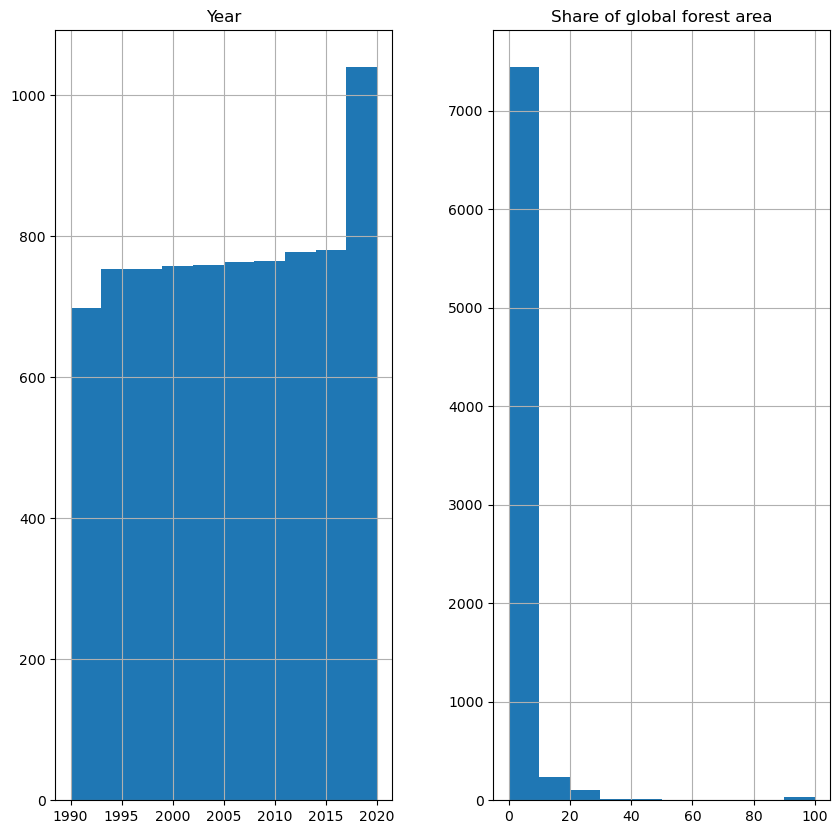

In [64]:
## task 1 EDA GFA DATA

globalForestArea.describe()
hist = globalForestArea.hist(bins=10
                            ,figsize =(10,10))

In [ ]:
#Merging and refininf data for visualisation

In [73]:
mergeGDPndGFA = pd.merge(globalGDP, globalForestArea, on=['Entity'], how = 'left')
mergeGDPndGFA.rename(columns={mergeGDPndGFA.columns[0]: 'Country'}, inplace=True)
print(mergeGDPndGFA)

            Country Code_x  Year_x  \
0       Afghanistan    AFG    2002   
1       Afghanistan    AFG    2002   
2       Afghanistan    AFG    2002   
3       Afghanistan    AFG    2002   
4       Afghanistan    AFG    2002   
...             ...    ...     ...   
169636     Zimbabwe    ZWE    2020   
169637     Zimbabwe    ZWE    2020   
169638     Zimbabwe    ZWE    2020   
169639     Zimbabwe    ZWE    2020   
169640     Zimbabwe    ZWE    2020   

        GDP per capita, PPP (constant 2017 international $) Code_y  Year_y  \
0                                             1189.784668      AFG  1990.0   
1                                             1189.784668      AFG  1991.0   
2                                             1189.784668      AFG  1992.0   
3                                             1189.784668      AFG  1993.0   
4                                             1189.784668      AFG  1994.0   
...                                                   ...      ...     ... 

In [ ]:
#visualisation

In [ ]:
## carbon average
#carbonEmissions['mean'] = carbonEmissions.mean(axis=1)

carbonEmissions2 = carbonEmissions.assign(mean=carbonEmissions.mean(axis=1))


<AxesSubplot:xlabel='GDP per capita, PPP (constant 2017 international $)', ylabel='Density'>

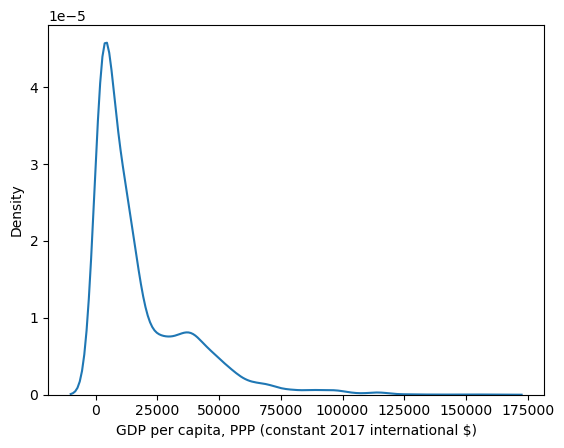

In [106]:
sns.kdeplot(globalGDP[ 'GDP per capita, PPP (constant 2017 international $)'])


<AxesSubplot:xlabel='Year', ylabel='Code'>

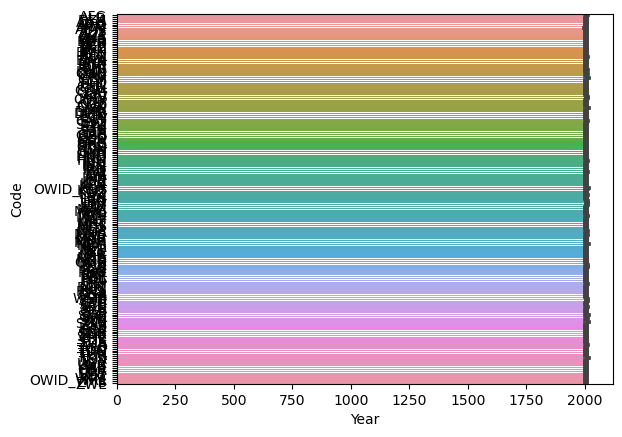

In [105]:
sns.barplot(x='Year',y='Code',data=globalGDP, estimator=np.median)


<AxesSubplot:xlabel='Year', ylabel='GDP per capita, PPP (constant 2017 international $)'>

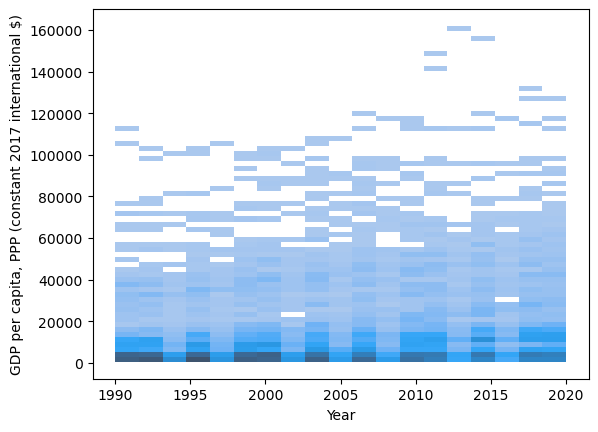

In [111]:
sns.histplot(data=globalGDP, x="Year", y='GDP per capita, PPP (constant 2017 international $)')

<AxesSubplot:xlabel='GDP per capita, PPP (constant 2017 international $)', ylabel='Share of global forest area'>

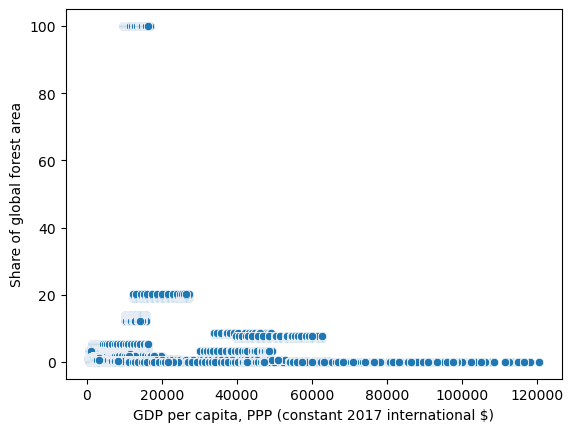

In [112]:


sns.scatterplot(data=mergeGDPndGFA, x="GDP per capita, PPP (constant 2017 international $)", y="Share of global forest area")

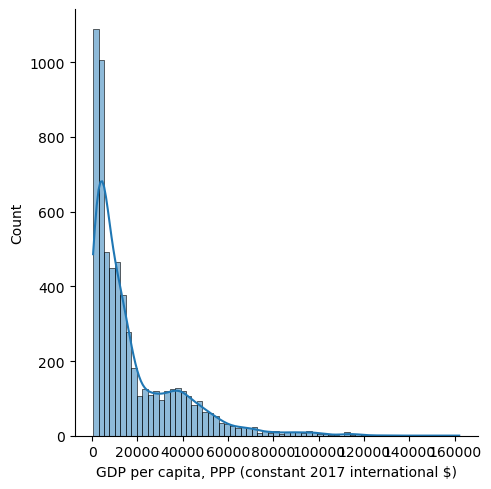

In [117]:
sns.displot(data=globalGDP, x="GDP per capita, PPP (constant 2017 international $)", kde=True)